In [2]:
import numpy as np
X = np.loadtxt("data.csv", delimiter=",")
y = np.loadtxt("labels.csv", delimiter=',')

In [3]:
X

array([[0.11184, 0.12387, 0.12858, ..., 0.60436, 0.56294, 1.0144 ],
       [0.29834, 0.26881, 0.26239, ..., 0.58386, 0.46658, 0.74867],
       [0.36912, 0.39587, 0.38999, ..., 0.49383, 0.62363, 0.61417],
       ...,
       [0.15921, 0.15782, 0.16968, ..., 0.63907, 0.62307, 1.0707 ],
       [0.94111, 0.95293, 0.9505 , ..., 0.99212, 0.97502, 0.97734],
       [0.25397, 0.2434 , 0.26774, ..., 0.83146, 0.76753, 0.81081]])

In [4]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

BASELINE

In [5]:
#Deault data
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GroupShuffleSplit

#SVC Classifier with Linear kernel
clf=SVC(kernel= "linear", gamma="auto") #Support vector classifier with linear kernel
groups = np.repeat(0,10)
for i in range(1,18):
    groups = np.hstack((groups, np.repeat(i,10)))

gss = GroupShuffleSplit(n_splits=18, test_size=0.2, random_state=17) #Group Shuffle Split with 18splits


for train_index, test_index in gss.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mean_cv_score = np.mean(cross_val_score(clf, X,y, groups=groups, cv=gss.split(X,y,groups)))
clf.fit(X_train,y_train)
print("Cross validation score ",mean_cv_score)
y_predict = clf.predict(X_test)
print("CLassifier Accuracy ",accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity ",(metrics.recall_score(y_test, y_predict)))
print("Specificity ",specificity1)

Cross validation score  0.8777777777777778
CLassifier Accuracy  0.8
Sensitivity  0.65
Specificity  0.95


FINDING OPTIMAL VALUE OF K

In [6]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
                                                      
rfecv = RFECV(estimator=clf, step=1, cv=gss.split(X,y,groups),scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Optimal number of features : 345


<Figure size 640x480 with 1 Axes>

CHI-SQAURE

In [7]:
#CHI-SQUARE on original data
from sklearn.feature_selection import SelectKBest, chi2
chi= SelectKBest(chi2, k=345) #K=345 as per the RFECV value and graph above
chi_data= chi.fit_transform(X, y)
cols = chi.get_support(indices=True)
new_data1 = X[:,cols] #extracting the selected features from the chi-square test

for train_index, test_index in gss.split(new_data1, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mean_cv_score = np.mean(cross_val_score(clf, X,y, groups=groups, cv=gss.split(new_data1,y,groups)))

clf.fit(X_train,y_train)

print("Cross validation score ",mean_cv_score)


y_predict = clf.predict(X_test)
print("Classifier Accurcay",accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity ",(metrics.recall_score(y_test, y_predict)))
print("Specificity ",specificity1)

Cross validation score  0.8777777777777778
Classifier Accurcay 0.8
Sensitivity  0.65
Specificity  0.95


ANOVA

In [8]:
#ANOVA on original data
from sklearn.feature_selection import SelectKBest, f_classif
anova=SelectKBest(f_classif, k=345) #K=345 as per the RFECV value and graph above
anova_data= anova.fit_transform(X, y)
cols = anova.get_support(indices=True)
new_data2 = X[:,cols] #extracting the selected features from the anova test

for train_index, test_index in gss.split(new_data2, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mean_cv_score = np.mean(cross_val_score(clf, new_data2,y, groups=groups, cv=gss.split(new_data2,y,groups)))

clf.fit(X_train,y_train)
print("Cross validation score ",mean_cv_score)

y_predict = clf.predict(X_test)
print("Classifier Accuracy",accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity ",(metrics.recall_score(y_test, y_predict)))
print("Specificity ",specificity1)

Cross validation score  0.8736111111111111
Classifier Accuracy 0.8
Sensitivity  0.65
Specificity  0.95


MUTUAL INFO

In [7]:

#Mutual info on original data
from sklearn.feature_selection import SelectKBest, mutual_info_classif
mu_info=SelectKBest(mutual_info_classif, k=345) #K=345 as per the RFECV value and graph above
mu_info_data= mu_info.fit_transform(X, y)
cols = mu_info.get_support(indices=True)
new_data4 = X[:,cols] #extracting the selected features from the mutual test

for train_index, test_index in gss.split(new_data4, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mean_cv_score = np.mean(cross_val_score(clf, new_data4,y, groups=groups, cv=gss.split(new_data4,y,groups)))

clf.fit(X_train,y_train)

print("Cross validation score ",mean_cv_score)

y_predict = clf.predict(X_test)
print("Classifier Accuracy ",accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity ",(metrics.recall_score(y_test, y_predict)))
print("Specificity ",specificity1)

Cross validation score  0.8555555555555556
Classifier Accuracy  0.8
Sensitivity  0.65
Specificity  0.95


RECURSIVE FEATURE ELIMINATION

In [10]:
#Recursive Feature elimination(RFE) - Wrapper method on original data
from sklearn.feature_selection import RFE
selector = RFE(clf, 345, step=1) #K=345 as per the RFECV value and graph above
selector = selector.fit(X, y)
cols = selector.support_
new_data3 = X[:,cols] #extracting the selected features from the RFE

for train_index, test_index in gss.split(new_data3, y, groups):
    X_train, X_test = new_data3[train_index], new_data3[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train,y_train)
    mean_cv_score = np.mean(cross_val_score(clf, new_data3,y, groups=groups, cv=gss.split(new_data3,y,groups)))

print("Cross validation score",mean_cv_score)

y_predict = clf.predict(X_test)
print("Classifier Accuracy ",accuracy_score(y_test, y_predict))


cm = confusion_matrix(y_test, y_predict)
specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity ",(metrics.recall_score(y_test, y_predict)))
print("Specificity ",specificity1)

Cross validation score 0.9125000000000001
Classifier Accuracy  0.875
Sensitivity  0.75
Specificity  1.0


EMBEDDED

In [19]:
#Embedded method
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
clf1=LinearSVC(C=0.05,penalty="l1", dual=False, max_iter=4000).fit(X,y)
for train_index, test_index in gss.split(X, y, groups):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1.fit(X_train,y_train)
    mean_cv_score = np.mean(cross_val_score(clf, X,y, groups=groups, cv=gss.split(X,y,groups)))
    #print(X_train, X_test, y_train, y_test)


print("Cross validation Score",mean_cv_score)

y_predict = clf1.predict(X_test)
print("Accuracy Score using loocv in for embedded dataset SVM ",accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity ",(metrics.recall_score(y_test, y_predict)))
print("Specificity ",specificity1)

Cross validation Score 0.8777777777777778
Accuracy Score using loocv in for embedded dataset SVM  0.8
Sensitivity  0.65
Specificity  0.95


CHI-SQAURE + RFE

Optimal number of features : 163


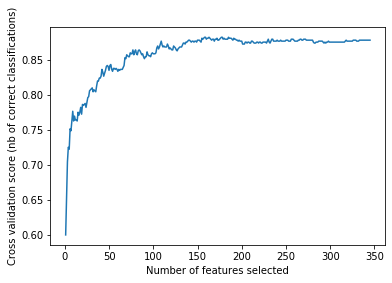

In [15]:
rfecv = RFECV(estimator=clf, step=1, cv=gss.split(new_data1,y,groups),scoring='accuracy')
rfecv.fit(new_data1, y)
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [16]:
#RFE on chi-square data
from sklearn.feature_selection import RFE

selector = RFE(clf, 163, step=1) #k=163 based on optimal value from RFECV
selector = selector.fit(new_data1, y) #newdata1 - data from chi-sqaure test
cols = selector.support_
new_data5 = new_data1[:,cols] #extracting the selected features from the chi-square+RFE

for train_index, test_index in gss.split(new_data5, y, groups):
    X_train, X_test = new_data5[train_index], new_data5[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train,y_train)
    mean_cv_score = np.mean(cross_val_score(clf, new_data5,y, groups=groups, cv=gss.split(new_data5,y,groups)))

print("Cross validation score",mean_cv_score)

y_predict = clf.predict(X_test)
print("Classifier Accuracy ",accuracy_score(y_test, y_predict))


cm = confusion_matrix(y_test, y_predict)
specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity ",(metrics.recall_score(y_test, y_predict)))
print("Specificity ",specificity1)

Cross validation score 0.9444444444444444
Classifier Accuracy  0.925
Sensitivity  0.85
Specificity  1.0


ANOVA + RFE

Optimal number of features : 184


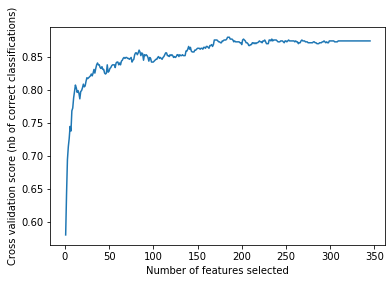

In [17]:
from sklearn.feature_selection import RFE
rfecv = RFECV(estimator=clf, step=1, cv=gss.split(new_data2,y,groups),scoring='accuracy')
rfecv.fit(new_data2, y)
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [18]:
#RFE on anova data

selector = RFE(clf, 184, step=1) #k=184 based on optimal value from RFECV
selector = selector.fit(new_data2, y)  #newdata2 - data from anova test
cols = selector.support_
new_data6 = new_data2[:,cols]

for train_index, test_index in gss.split(new_data6, y, groups):
    X_train, X_test = new_data6[train_index], new_data6[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mean_cv_score = np.mean(cross_val_score(clf, new_data6,y, groups=groups, cv=gss.split(new_data6,y,groups)))

clf.fit(X_train,y_train)
print("Cross validation score ",mean_cv_score)

y_predict = clf.predict(X_test)
print("Classifer Accuracy  ",accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity ",(metrics.recall_score(y_test, y_predict)))
print("Specificity ",specificity1)

Cross validation score  0.9458333333333333
Classifer Accuracy   0.85
Sensitivity  0.75
Specificity  0.95


MUTUAL INFO + RFE

Optimal number of features : 215


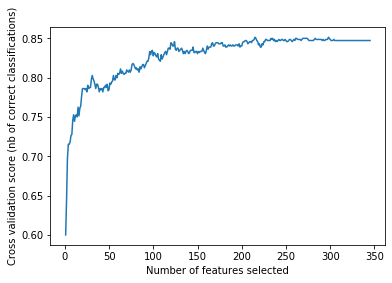

In [19]:
from sklearn.feature_selection import RFE
rfecv = RFECV(estimator=clf, step=1, cv=gss.split(new_data4,y,groups),scoring='accuracy')
rfecv.fit(new_data4, y)
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [28]:
#RFE on mutual info data

selector = RFE(clf, 215, step=1) #k=215 based on optimal value from RFECV
selector = selector.fit(new_data4, y)  #new_data4 - data from mutual info test
cols = selector.support_
new_data7 = new_data4[:,cols]

for train_index, test_index in gss.split(new_data7, y, groups):
    X_train, X_test = new_data7[train_index], new_data7[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train,y_train)
    mean_cv_score = np.mean(cross_val_score(clf, new_data6,y, groups=groups, cv=gss.split(new_data6,y,groups)))

print("Cross Validation Score ",mean_cv_score)

y_predict = clf.predict(X_test)
print("Classifier Accuracy ",accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity ",(metrics.recall_score(y_test, y_predict)))
print("Specificity ",specificity1)

Cross Validation Score  0.9458333333333333
Classifier Accuracy  0.875
Sensitivity  0.8
Specificity  0.95
